<a href="https://www.kaggle.com/code/yunasheng/image-to-image?scriptVersionId=162390007" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Image-to-image

Image-to-image is similar to text-to-image, but in addition to a prompt, you can also pass an initial image as a starting point for the diffusion process. The initial image is encoded to latent space and noise is added to it. Then the latent diffusion model takes a prompt and the noisy latent image, predicts the added noise, and removes the predicted noise from the initial latent image to get the new latent image. Lastly, a decoder decodes the new latent image back into an image.

With 🤗 Diffusers, this is as easy as 1-2-3:

# Load a checkpoint 

Here we are going to use AutoPipelineForImage2Image class; this pipeline automatically handles loading the correct pipeline class based on the checkpoint:

In [1]:
!pip install diffusers==0.23.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 19.4 MB/s eta 0:00:00


In [2]:
import torch
from diffusers import AutoPipelineForImage2Image
from diffusers.utils import load_image, make_image_grid

pipeline = AutoPipelineForImage2Image.from_pretrained(
    "kandinsky-community/kandinsky-2-2-decoder", torch_dtype=torch.float16, use_safetensors=True
)
pipeline.enable_model_cpu_offload()
pipeline
# remove following line if xFormers is not installed or you have PyTorch 2.0 or higher installed
# pipeline.enable_xformers_memory_efficient_attention()

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

2024-02-10 10:51:59.588791: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-10 10:51:59.588916: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-10 10:51:59.742904: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


model_index.json:   0%|          | 0.00/250 [00:00<?, ?B/s]

Fetching 7 files:   0%|          | 0/7 [00:00<?, ?it/s]

movq/config.json:   0%|          | 0.00/660 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/317 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.67k [00:00<?, ?B/s]

README.md:   0%|          | 0.00/7.34k [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/271M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/5.01G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/3 [00:00<?, ?it/s]

model_index.json:   0%|          | 0.00/501 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

image_processor/preprocessor_config.json:   0%|          | 0.00/315 [00:00<?, ?B/s]

image_encoder/config.json:   0%|          | 0.00/2.01k [00:00<?, ?B/s]

prior/config.json:   0%|          | 0.00/252 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/2.02k [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/904 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/3.69G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/4.10G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.78G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

KandinskyV22Img2ImgCombinedPipeline {
  "_class_name": "KandinskyV22Img2ImgCombinedPipeline",
  "_diffusers_version": "0.23.1",
  "_name_or_path": "kandinsky-community/kandinsky-2-2-decoder",
  "movq": [
    "diffusers",
    "VQModel"
  ],
  "prior_image_encoder": [
    "transformers",
    "CLIPVisionModelWithProjection"
  ],
  "prior_image_processor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "prior_prior": [
    "diffusers",
    "PriorTransformer"
  ],
  "prior_scheduler": [
    "diffusers",
    "UnCLIPScheduler"
  ],
  "prior_text_encoder": [
    "transformers",
    "CLIPTextModelWithProjection"
  ],
  "prior_tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "scheduler": [
    "diffusers",
    "DDPMScheduler"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ]
}

We use `enable_model_cpu_offload()` and `enable_xformers_memory_efficient_attention()`, to save memory and increase inference speed. If you’re using PyTorch 2.0, then you don’t need to call enable_xformers_memory_efficient_attention() on your pipeline because it’ll already be using PyTorch 2.0’s native scaled-dot product attention.

# Load an image to pass to the pipeline

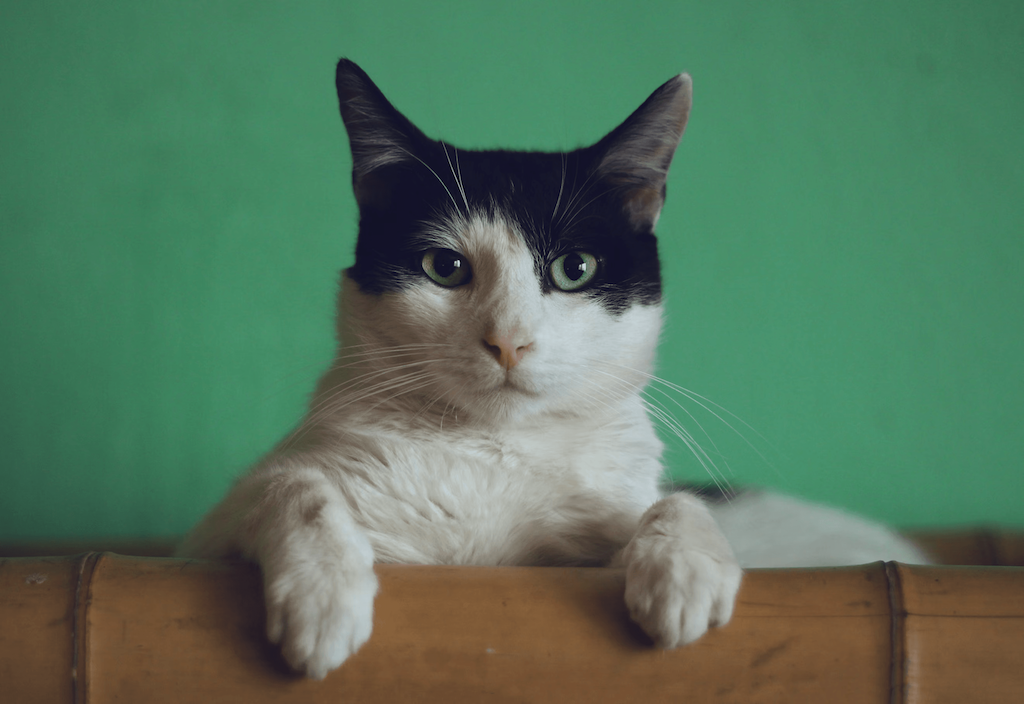

In [3]:
init_image = load_image("https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/diffusers/cat.png")
init_image

# Credit

* https://huggingface.co/docs/diffusers/using-diffusers/img2img